### Simple linear regression

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

#### Steps of linear regression:
1) Data generation 
2) Visualization 
3) Initialize variable
4) train the model and check the values of variable
5) prediction

### MANUAL LINEAR REGRESSION

Let's start with Data generation

In [ ]:
# import useful packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# number of training examples
observation = 1200

# Let's generate two feautures
x1 = np.random.uniform(-10, 10, size = (observation,1))
x2 = np.random.uniform(-10, 10, size = (observation,1))

gen_inputs = np.column_stack((x1, x2))

noise = np.random.uniform(-1, 1, (observation,1)) # This will help the model to learn features

# Let's genere the targets
gen_target = 3*x1 + 2*x2 + 4 + noise

# Let's save so that we can easily access it later
np.savez('TF-INFO', inputs = gen_inputs, targets = gen_target)

Let's visualize the data in 3D

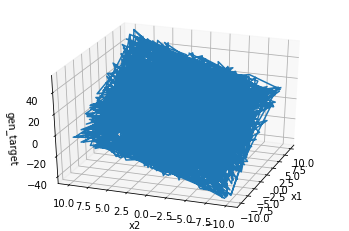

In [ ]:
# let's reshape the targets before
gen_target = gen_target.reshape(observation,)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# choose axis
ax.plot(x1, x2, gen_target)

# set axis
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('gen_target')

# use azim parameter to plot the data from different angle. One can change the value of azim to see the effect
ax.view_init(azim=200)

plt.show()

#Let's reshape back our targets
gen_target = gen_target.reshape(observation,1)

In [ ]:
# initalize the variable: weigh, bias and learning rate
init_range = 0.1
weigh = np.random.uniform(low=-init_range, high=init_range,size=(2,1))
bias = np.random.uniform(low=-init_range, high=init_range,size=1)

lr = 0.02

In [ ]:
# To train the model
for i in range(300):
    #output = xw + b
    output = np.dot(gen_inputs, weigh) + bias
    delta = output - gen_target
    loss = np.sum(delta**2)/(2*observation)
    print(loss)
    
    # To scaled the delta values
    delta_scaled = delta / observation
    
    weigh = weigh - lr*np.dot(gen_inputs.T, delta_scaled)
    bias = bias - lr*np.sum(delta_scaled)
    
    

233.14434881632906
32.8376839393445
10.563613557992428
7.848355005934446
7.291351338164903
6.981578064106047
6.708790873585635
6.449514000279079
6.20079562976133
5.961952491955309
5.732564646000686
5.51225471806812
5.300663117793484
5.0974447977851405
4.90226839952127
4.714815681045158
4.534780994545199
4.361870787600001
4.19580312448918
4.036307226483334
3.8831230303300117
3.736000764212046
3.5947005404864845
3.4589919645399587
3.328653759122798
3.2034734035492476
3.0832467871755833
2.9677778765910694
2.8568783959790953
2.7503675201273308
2.6480715795863317
2.5498237774958565
2.4554639176171493
2.364838143127762
2.277798685752999
2.1942036248249366
2.113916655876157
2.03680686839087
1.9627485323510667
1.8916208932296241
1.8233079750961265
1.757698391514333
1.6946851639229714
1.634165547203702
1.5760408621518722
1.5202163345768558
1.4666009407696443
1.4151072590857408
1.3656513274013091
1.3181525062102113
1.272533347138659
1.2287194666631238
1.18663942482558
1.1462246087483265
1.107409

In [ ]:
# check our bias and weigh
print(weigh, bias)

[[2.99764426]
 [2.00171856]] [3.99893705]


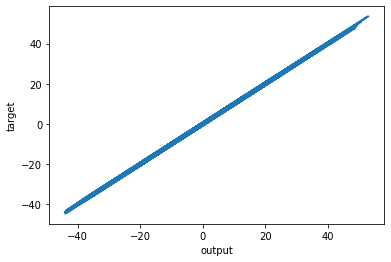

In [ ]:
# let's plot output and target
plt.plot(output, gen_target)
plt.xlabel('output')
plt.ylabel('target')
plt.show()

# the target and the output are closer

### Now let's solve linear regression using tensorflow

In [ ]:
# load training data from npz file
training_data = np.load('TF-INFO.npz')

In [ ]:
# Let's create our model using keras
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    # use the dense layer that represent our mathematical formula xw + b
    tf.keras.layers.Dense(output_size, 
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                        
    )
])
optim = tf.keras.optimizers.SGD()
model.compile(optimizer=optim, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=20, verbose=2)

Epoch 1/20
38/38 - 0s - loss: 23.2553
Epoch 2/20
38/38 - 0s - loss: 2.2180
Epoch 3/20
38/38 - 0s - loss: 0.7428
Epoch 4/20
38/38 - 0s - loss: 0.4259
Epoch 5/20
38/38 - 0s - loss: 0.3622
Epoch 6/20
38/38 - 0s - loss: 0.3441
Epoch 7/20
38/38 - 0s - loss: 0.3415
Epoch 8/20
38/38 - 0s - loss: 0.3449
Epoch 9/20
38/38 - 0s - loss: 0.3421
Epoch 10/20
38/38 - 0s - loss: 0.3411
Epoch 11/20
38/38 - 0s - loss: 0.3410
Epoch 12/20
38/38 - 0s - loss: 0.3376
Epoch 13/20
38/38 - 0s - loss: 0.3431
Epoch 14/20
38/38 - 0s - loss: 0.3442
Epoch 15/20
38/38 - 0s - loss: 0.3390
Epoch 16/20
38/38 - 0s - loss: 0.3450
Epoch 17/20
38/38 - 0s - loss: 0.3386
Epoch 18/20
38/38 - 0s - loss: 0.3412
Epoch 19/20
38/38 - 0s - loss: 0.3486
Epoch 20/20
38/38 - 0s - loss: 0.3415


#### extract weigh and bias to check our response


In [ ]:
# extract weigh and bias to check our response
model.layers[0].get_weights()

[array([[3.0180697],
        [2.0067937]], dtype=float32), array([4.0121284], dtype=float32)]

In [ ]:
# save weigh and bias in a separate variable
weigh = model.layers[0].get_weights()[0]
weigh

array([[3.0180697],
       [2.0067937]], dtype=float32)

In [ ]:
bias = model.layers[0].get_weights()[1]
bias

array([4.0121284], dtype=float32)

#### Extract the output (make predictions)


In [ ]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[13.2],
       [10.3],
       [22.4],
       ...,
       [-8. ],
       [20. ],
       [12.1]], dtype=float32)

In [ ]:
training_data['targets'].round(1)

array([[14. ],
       [ 9.6],
       [22.2],
       ...,
       [-8.9],
       [19.1],
       [11.7]])

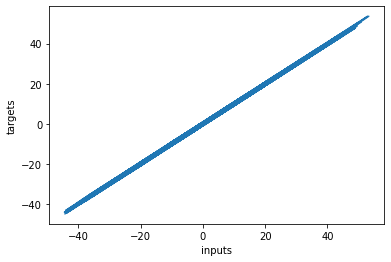

In [ ]:
# plotting the data
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('inputs')
plt.ylabel('targets')
plt.show()

### Deep neural network for MNIST Classification

The dataset is called MNIST and refers to handwritten digit recognition. The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image). 

The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes. 

In [ ]:
#!pip3 install tensorflow-datasets
#!pip install -q tensorflow tensorflow-datasets matplotlib
#!pip install tensorflow==2.1.0
#!pip install --upgrade tensorflow

In [ ]:
#!pip install tensorflow==2.0.0-beta0
#!pip3 install tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [ ]:
#!pip install tensorflow-datasets


In [ ]:
#from keras.datasets import mnist
import tensorflow_datasets as tfds

In [ ]:
# To load the data
#(mnist_train, target_train), (mnist_test, target_test) = mnist.load_data()
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [ ]:
# def scale(image, label):
#     # make sure the values are float
#     image = tf.cast(image, tf.float32)
#     image /=255
#     return image, label

# #print(mnist_train.reshape(60000,-1).shape)
# mnist_train = tf.convert_to_tensor(
#     mnist_train, dtype=tf.float64)

# scale_mnist_train = mnist_train.map(scale)
# scale_mnist_test = mnist_train.map(scale)
# train = np.concatenate([scale_mnist_train.reshape(60000,-1), target_train.reshape(-1,1)], axis = 1)

# train_shuffle = np.random.permutation(train)

# X = train_shuffle[:int(.9*len(train))]
# print(X.shape)
# V = train_shuffle[int(.9*len(train)):]
# feature = X[:,:-1].reshape(len(X), 28,28)
# target = X[:,-1]
# feature_v = V[:,:-1].reshape(-1, 28,28)
# target_v = V[:,-1]

In [ ]:
# to split the data
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']
num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
# # let's cast this number to an integer
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)


In [ ]:
# Let's scale our images
def scale(image, label):
    # make sure the values are float
    image = tf.cast(image, tf.float32)
    image /=255
    return image, label


# to apply this scale function to our train and test set by using .map() function
scale_train_and_validation_data = mnist_train.map(scale)
scale_test_data = mnist_test.map(scale)

# # to shuffle the data
BUFFER_SIZE = 10000
shuffle_train_and_validation_data = scale_train_and_validation_data.shuffle(BUFFER_SIZE)

# let's extract our validation and train data from the shufle data
validation_data = shuffle_train_and_validation_data.take(num_validation_samples)
train_data = shuffle_train_and_validation_data.skip(num_validation_samples)

# let's set the batch size
batch_size = 100 # One can try with batch_size = 150
train_data = train_data.batch(batch_size)
validation_data = validation_data.batch(num_validation_samples)
test_data = scale_test_data.batch(num_test_samples)

# takes next batch (it is the only batch)
validation_inputs, validation_targets = next(iter(validation_data))

### Model

In [ ]:
input_size = 28*28
output_size = 10

hidden_layer_size = 50 # One can try to use hidden_layer_size=5000

model = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (28,28,1)), # we can add more layers (up to 10)
    
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    # tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    
    tf.keras.layers.Dense(output_size, activation='softmax')
    
])


model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
num_epochs = 10
model.fit(train_data, epochs=num_epochs, validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/10
540/540 - 9s - loss: 0.4174 - accuracy: 0.8834 - val_loss: 0.2202 - val_accuracy: 0.9350
Epoch 2/10
540/540 - 8s - loss: 0.1894 - accuracy: 0.9456 - val_loss: 0.1558 - val_accuracy: 0.9552
Epoch 3/10
540/540 - 9s - loss: 0.1404 - accuracy: 0.9594 - val_loss: 0.1237 - val_accuracy: 0.9655
Epoch 4/10
540/540 - 8s - loss: 0.1173 - accuracy: 0.9654 - val_loss: 0.1041 - val_accuracy: 0.9708
Epoch 5/10
540/540 - 8s - loss: 0.0985 - accuracy: 0.9714 - val_loss: 0.0945 - val_accuracy: 0.9725
Epoch 6/10
540/540 - 8s - loss: 0.0866 - accuracy: 0.9753 - val_loss: 0.0963 - val_accuracy: 0.9703
Epoch 7/10
540/540 - 8s - loss: 0.0752 - accuracy: 0.9779 - val_loss: 0.0838 - val_accuracy: 0.9743
Epoch 8/10
540/540 - 8s - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0692 - val_accuracy: 0.9797
Epoch 9/10
540/540 - 8s - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0631 - val_accuracy: 0.9813
Epoch 10/10
540/540 - 8s - loss: 0.0538 - accuracy: 0.9839 - val_loss: 0.0626 - val_accuracy: 0.9800

### Test of the model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

print('test_loss: {0:.2f}. test_accuracy:{1:.2f}%'.format(test_loss, test_accuracy*100.)) 

1/1 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9718
test_loss: 0.09. test_accuracy:97.18%


#### The test_accuracy below shows that our model is good at 97.18%. It means that for any new image, the model can classify it with an uncertainty of 3%.